# SIESTA: Statistical matchIng between rEal and Synthetic sTellar populAtions

In this Notebook, you will analyze the results of the MCMC sampling performed using the `SIESTA` code. We assume you've already used the  ``InitializationHUB`` Notebook to create your inputs and ran (or is currently running) the MCMC sampling for a given star cluster, which means you'll have a ``backend.h5`` in your project directory. Let's open this file and analyze the results.

Notice that this Notebook will create a copy of the ``backend.h5`` file. This is done to allow you to safely use the Notebook while still running the MCMC sampling, to visualize partial results before convergence.

## First steps

We will start by importing the necessary libraries.

In [1]:
#Import libraries
import importlib
import sys ; sys.path.append('modules')
import ChainAnalysis
import matplotlib.pyplot as plt
%matplotlib widget

Now, let's import the ``backend.h5`` file. In the following block, fill the  ``project_name`` parameter with the project you want to evaluate. This name must correspond to a folder in the ``projects`` directory.

In [2]:
#Choose a project
project = 'L113example'
#Get data
importlib.reload(ChainAnalysis)
auto_corr_time, backend, inputs = ChainAnalysis.ImportData(project)

## Checking convergence

It's important to certify that our chain has converged before inferring results for a star cluster. The creators of ``emcee`` suggest using the chain's autocorrelation time for that end. When running an MCMC sampler, this parameter tends to increase while the iterations advance, saturating when the chain gets too long. We consider that we've reached convergence when this saturation occurs. Beyond that, we need to discard correlated iterations before inferring parameters for the cluster. To ensure that we'll still have a statistically relevant number of independent samples, the number of iterations must also be a few times larger than the autocorrelation time.

Following the suggestions of the creators of ``emcee``, SIESTA takes these  into account by running the sampler until these two conditions are satisfied:
- The variation of the autocorrelation time between samples separated by 100 iterations must be smaller than 1%.
- The total number of iterations is greater than 50 times the last correlation time evaluated.

Even though these criteria are already implemented in the code, it's still useful to check the convergence visually, which you can do by running the next block, where we plot the progression of the average autocorrelation time. Please note that for running the following block withou errors, your MCMC sampling must have, at least, 200 iterations.


Final mean autocorrelation time: 68.94
	 Total iteration number is ~45 times larger than this value!
	 Final variation is 0.33%


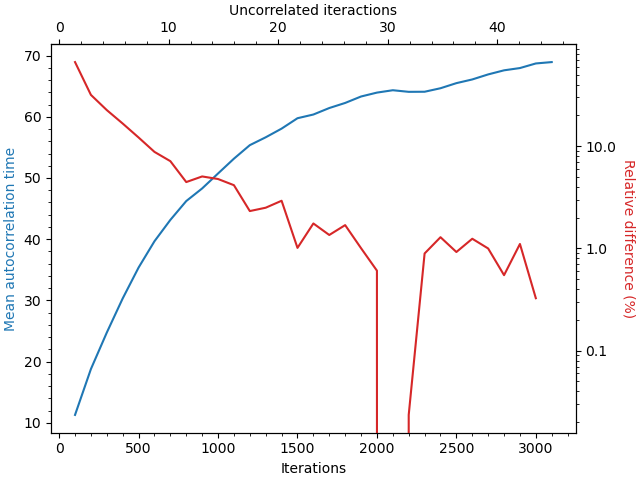

In [3]:
#Autocorrelation time
importlib.reload(ChainAnalysis)
try: plt.close(figAutoCorrelation)
except: ''
tau,figAutoCorrelation = ChainAnalysis.AutoCorrelation(auto_corr_time)

## Checking samples

Before analyzing the solutions, in the more traditional form of the corner plot, it's interesting to check how the walkers behaved during the MCMC sampling. This block plots the different values of a subset of walkers during the sampling for each parameter (metallicity, age, distance, color excess, and binary fraction). We also display the posterior probability of the walkers during the sampling. 

You can use the ``Filter`` parameter to choose how you want to visualize the walkers' path. Setting it as ``True`` will display only the "effective" iterations: without the burn-in phase and thinning correlated iterations. Those are the iterations we use for characterizing the cluster. If you wish to visualize the full path, you can set this variable as ``False``.

You can also define how many walkers you want to see in the figure using the ``walkers_show`` parameter. Select any integer between 1 and the total number of walkers you've defined earlier. When choosing this and the ``Filter`` parameters, keep in mind that chains can be quite long, and plotting lots of points can result in heavy images. 

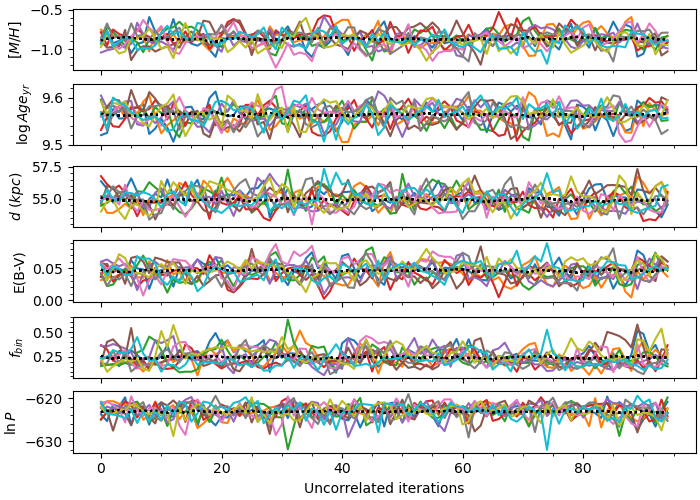

In [4]:
#Chain
importlib.reload(ChainAnalysis)
try: plt.close(figSamples)
except: ''

#Parameters
Filter = True
walkers_show= 10

samples,logprob,figSamples = ChainAnalysis.Samples(backend,inputs,
                                                   Filter,   
                                                   walkers_show)

## Checking the solution

Finally, we can check the solution obtained by the ``SIESTA`` code. In the following blocks, the samples from the MCMC will be marginalized in 2 and 1 dimentions. The 1D marginalized *posteriors* will be converted into histograms and skewed-normal distributions will be fitted to them.

Before running the next block, define a few parameters bellow:

-  `labels`: could be defined in two forms
    - A list of strings for labeling the corner plot, with the structure ``['metallicity' ,'age' ,'distance', 'extinction_parameter', 'binary_fraction']``,
    - An empty string (``''``), in which case, automathic labels will be generated;
- `bins`: a list with the number of bins for each sampled parameter to be used in the histograms. Alternatively, any strings compatible with the [``astropy histogram``](https://docs.astropy.org/en/stable/visualization/histogram.html) can be applied,
    - Example: ['30','40','50','knuth','blocks'];
- `quantiles_min`, `quantiles_max` : a list with minimum and maximum quantiles for each sampled parameter. Values must be between 0 and 1. Marginalized posteriors will be evaluated between `quantiles_min` and `quantiles_max`. Useful for when constraining the parameter space is necessary (e.g., a *posterior* with a negligible amount of samples very distant from the average solution),
    - Using `quantiles_min = [0,0,0,0,0]`  and `quantiles_max = [1,1,1,1,1]` means that all samples will be considered for every parameter;
- `title`: string to be used as title for the corner plot; 
- `age_plot`: by default, the age is sampled in logarithmic form. This parameter defines how it will be evaluated in the *posterior*:
    - `age_plot = 'log'`: age represented in logarithmic form,
    - `age_plot = 'Gyr'`: age represented Gigayears,
    - `age_plot = 'Myr'`: age represented Megayears
- `dist_plot`: by default, the distance is sampled in kiloparsecs. This parameter defines how it will be evaluated in the *posterior*:
    - `dist_plot = 'kpc'`: distance represented in kiloparsecs
    - `dist_plot = 'modulus'`: distance represented as distance modulus

Fitted parameters were stored in projects/L113example/results.dat
Corner plot saved in projects/L113example/corner.pdf


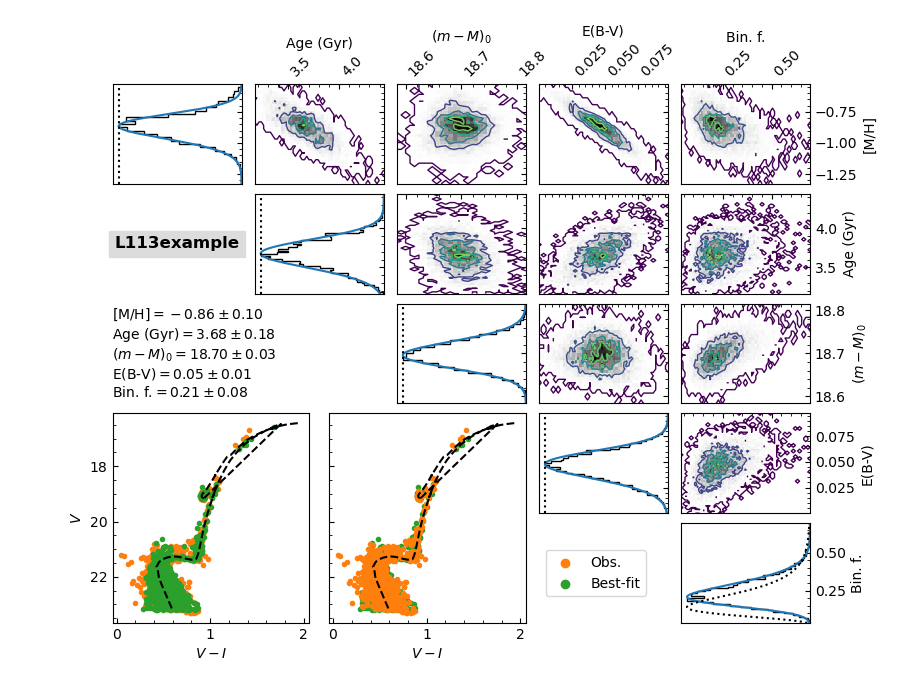

No such comm: 97de9897708a4835a2ba6a92f4ff76ed


No such comm: ea980de072da435c88250a3fbd1d602e


In [5]:
#Corner
importlib.reload(ChainAnalysis)
try: plt.close(figCorner)
except: ''
import matplotlib.pyplot as plt
plt.close('all')

#Parameters
labels = ''
bins = ['knuth','knuth','knuth','knuth','knuth']
quantiles_min = [0,0,0.,0,0]
quantiles_max = [1,1,1,1,1]
title = project
figCorner=  ChainAnalysis.MaginalPosterior(samples,inputs,labels,bins,quantiles_min,quantiles_max,title,
                                           age_plot='Gyr',dist_plot='modulus',obs_label='Obs.',synt_label='Best-fit')


## Saving images

This last block saves all figures into a PDF file in the corresponding project directory.

In [6]:
importlib.reload(ChainAnalysis)
ChainAnalysis.SaveAll(inputs,[figAutoCorrelation,figSamples,figCorner])

Check projects/SL828redprior/results.pdf for the images created in this Notebook


In [14]:
a = [0,1,2,3,4,5,6,7,8,9]

In [21]:
a[3::7]

[3]